In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("C:/Users/RISH/Downloads/IMDb Movies India.csv", encoding='ISO-8859-1')

In [3]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
# Handle missing data
data['Rating'].fillna(data['Rating'].median(), inplace=True)
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)
data['Director'].fillna(data['Director'].mode()[0], inplace=True)
data['Actor 1'].fillna(data['Actor 1'].mode()[0], inplace=True)

In [10]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=['Genre', 'Director', 'Actor 1'], drop_first=True)

print(data.head())

                                 Name    Year Duration  Rating Votes  \
0                                         NaN      NaN     6.0   NaN   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min     7.0     8   
2                         #Homecoming  (2021)   90 min     6.0   NaN   
3                             #Yaaram  (2019)  110 min     4.4    35   
4                   ...And Once Again  (2010)  105 min     6.0   NaN   

              Actor 2          Actor 3  Genre_Action, Adventure  \
0              Birbal  Rajendra Bhatia                        0   
1      Vivek Ghamande    Arvind Jangid                        0   
2   Plabita Borthakur       Roy Angana                        0   
3          Ishita Raj  Siddhant Kapoor                        0   
4  Rituparna Sengupta      Antara Mali                        0   

   Genre_Action, Adventure, Biography  Genre_Action, Adventure, Comedy  ...  \
0                                   0                                0  ...   
1     

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Check for non-numeric columns
print("Non-numeric columns before encoding:", data.select_dtypes(include=['object']).columns)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Name', 'Year', 'Duration', 'Votes', 'Actor 2', 'Actor 3'], drop_first=True)

# Check for non-numeric columns after encoding
print("Non-numeric columns after encoding:", data.select_dtypes(include=['object']).columns)

Non-numeric columns before encoding: Index(['Name', 'Year', 'Duration', 'Votes', 'Actor 2', 'Actor 3'], dtype='object')
Non-numeric columns after encoding: Index([], dtype='object')


In [13]:
# Define the feature set and target variable
X = data.drop('Rating', axis=1)
y = data['Rating']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Prediction
y_pred = model.predict(X_test)

In [17]:
# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 0.9431191701141156
R^2 Score: 0.03012164065583245


In [19]:
# Feature
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})

print(coefficients.sort_values(by='Coefficient', ascending=False))

                        Feature  Coefficient
18633             Name_MMS Kand     2.498072
12176        Name_Anyay Abichar     2.478904
21548             Name_Ram-Path     2.377114
13609      Name_Chambal Ki Rani     1.970674
5025   Director_Samarth Mahajan     1.859396
...                         ...          ...
13851               Name_Chirag    -2.061259
23005        Name_Son of Sinbad    -2.063514
21602          Name_Ranga Khush    -2.102925
20831           Name_Piya Pyare    -2.249829
17130                Name_Jigar    -3.146670

[36999 rows x 2 columns]


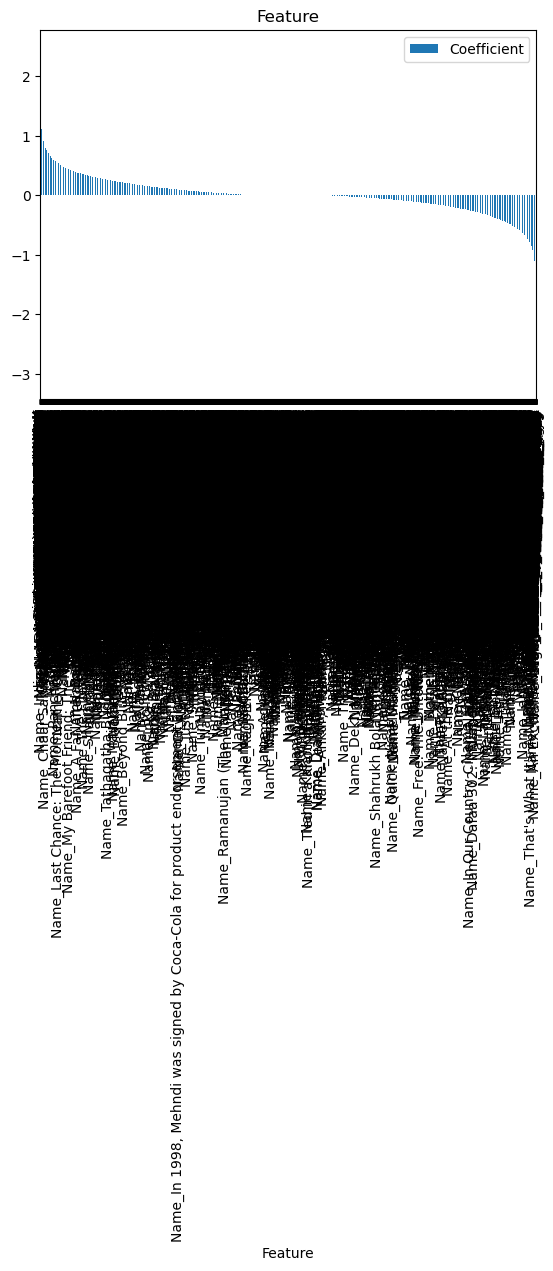

In [21]:
# Plotting Feature
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar', x='Feature', y='Coefficient')
plt.title('Feature')
plt.show()